In [1]:
# Import the different libraries:

import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import matplotlib as plt
import numpy as np

In [2]:
# Load the DataFrame
exo_nasa = pd.read_csv("../data/combined/main_frame.csv", low_memory=False)    

In [3]:
#Replace NaNs in pl_eqt with temp_calculated from EU table if there is any. Otherwise it keeps the NaN

exo_nasa.pl_eqt = np.where(exo_nasa.pl_eqt.isnull(), exo_nasa.temp_calculated, exo_nasa.pl_eqt)

In [4]:
# Get rid of all NaN temperatures
exo_nasa = exo_nasa.dropna(subset=["pl_eqt"])

In [5]:
looking_at = ["pl_name","st_mass","pl_orbper","st_teff","st_dist","pl_discmethod","pl_bmassj", "pl_eqt","st_rad","pl_dens","star_mass","star_teff","star_distance","detection_type","mass","temp_calculated","star_radius"]
exo_nasa= exo_nasa[looking_at]

In [6]:
# Calculate temperature in Celsius from Kelvin
exo_nasa['pl_eqt'] = exo_nasa['pl_eqt'] -273

In [7]:
# Inserd a planet ID called pl_id
exo_nasa.insert(0,"pl_id",range(len(exo_nasa)))

In [8]:
# Define all nessessarry functions:
def pa_2_km(st_dist):
    return st_dist * 3.26156 * 365.25 * 24 * 60 * 60 * 300000

def by_car(st_dist_km):
    car_speed = 200 #km/h
    hours_to_year = 24*265.25
    return st_dist_km/200/hours_to_year

def by_plane(st_dist_km):
    plane_speed = 1000 #km/h
    hours_to_year = 24*265.25
    return st_dist_km/plane_speed/hours_to_year

def by_rocket(st_dist_km):
    rocket_speed = 11.2 #km/s
    seconds_to_year = 24*265.25*60*60
    return st_dist_km/rocket_speed/seconds_to_year




In [9]:
exo_nasa["st_dist_km"] = pa_2_km(exo_nasa["st_dist"])

In [10]:
exo_nasa["years_by_car"] = by_car(exo_nasa["st_dist_km"])

In [11]:
exo_nasa["years_by_plane"] = by_plane(exo_nasa["st_dist_km"])

In [12]:
exo_nasa["years_by_rocket"] = by_rocket(exo_nasa["st_dist_km"])

In [13]:
exo_nasa = exo_nasa.sort_values("years_by_rocket")

In [14]:
exo_nasa["pl_mass_e"] = exo_nasa["pl_bmassj"]*317.8

In [15]:
exo_nasa = exo_nasa.drop(columns=["star_teff","star_radius", "star_distance", "star_mass", "st_rad", "detection_type", "mass", "temp_calculated", "pl_dens", "pl_discmethod"])

In [16]:
exo_nasa.to_csv("../data/final/final_frame.csv", index=False)

In [17]:
exo_nasa

,pl_id,pl_name,st_mass,pl_orbper,st_teff,st_dist,pl_bmassj,pl_eqt,st_dist_km,years_by_car,years_by_plane,years_by_rocket,pl_mass_e
2979,330,Proxima Cen b,0.12,11.186000,3050.0,1.30,0.00400,-39.0,4.014153e+13,3.152806e+07,6.305613e+06,1.563892e+05,1.271200
3543,482,GJ 411 b,0.39,12.953200,3563.0,2.55,0.00941,77.0,7.873916e+13,6.184351e+07,1.236870e+07,3.067635e+05,2.990498
3408,387,Ross 128 b,0.17,9.865800,3192.0,3.38,0.00440,28.0,1.043680e+14,8.197297e+07,1.639459e+07,4.066119e+05,1.398320
145,35,HD 20794 b,0.70,18.315000,5401.0,6.00,0.00850,387.0,1.852686e+14,1.455141e+08,2.910283e+07,7.217964e+05,2.701300
146,36,HD 20794 c,0.70,40.114000,5401.0,6.00,0.00760,235.0,1.852686e+14,1.455141e+08,2.910283e+07,7.217964e+05,2.415280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,115,Kepler-40 b,1.48,6.873490,6510.0,2700.00,2.20000,1347.0,8.337087e+16,6.548137e+10,1.309627e+10,3.248084e+08,699.160000
2675,274,OGLE-2005-BLG-071L b,0.46,NaN,NaN,3200.00,3.80000,-218.0,9.880993e+16,7.760754e+10,1.552151e+10,3.849581e+08,1207.640000
2587,263,WTS-1 b,1.20,3.352057,6250.0,3200.00,4.01000,1227.0,9.880993e+16,7.760754e+10,1.552151e+10,3.849581e+08,1274.378000
2624,268,MOA-2007-BLG-400L b,0.30,NaN,NaN,5800.00,0.83000,-170.0,1.790930e+17,1.406637e+11,2.813273e+10,6.977365e+08,263.774000


In [18]:
# Plotting and creating Figure 3: star distance vs. planet temperature

In [19]:
df_3 = exo_nasa.copy()

In [20]:
len(df_3)

783

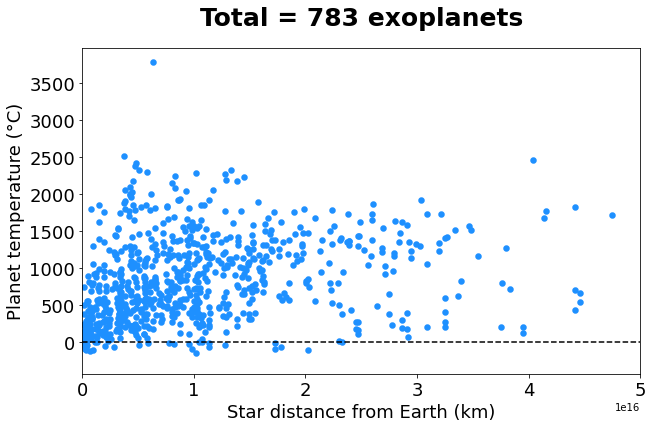

In [21]:
plot_3 = df_3.plot.scatter(x="st_dist_km", 
                        y="pl_eqt",
                        c="dodgerblue",
                        figsize=(10,6),
                        xlim=(0,0.5*10**17),
                        fontsize=18,
                        linewidth=2)

plot_3.set_xlabel("Star distance from Earth (km)").set_fontsize(18)
plot_3.set_ylabel("Planet temperature (°C)").set_fontsize(18)
plot_3.axhline(y=0, xmin=0, xmax=1, color="black", ls='--')
plot_3.set_facecolor("white")
plot_3.set_title(f"Total = {len(df_3)} exoplanets", fontsize=25, fontweight='bold').set_position([0.5, 1.05])

fig_3 = plot_3.get_figure()

In [22]:
fig_3.savefig("../Figures/fig_3.png", dpi=600)

In [23]:
# Plotting and creating Figure 4: star distance vs. planet temperature in a temperature range close to earth's

In [24]:
df_4 = exo_nasa.copy()

In [25]:
df_4 = df_4[df_4.pl_eqt < 60]

In [26]:
df_4 = df_4[df_4.pl_eqt > -60]

In [27]:
len(df_4)

28

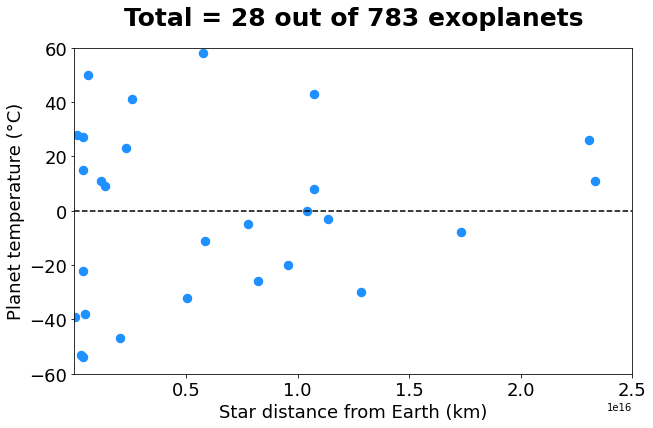

In [28]:
plot_4 = df_4.plot.scatter(x="st_dist_km", 
                        y="pl_eqt",
                        c="dodgerblue",
                        figsize=(10,6),
                        xlim=(20000000,0.25*10**17),  # 20000000 as lower limit to avoid the 0.0 in the axis
                        ylim=(-60,60),
                        fontsize=18,
                        linewidth=5)

plot_4.set_xlabel("Star distance from Earth (km)").set_fontsize(18)
plot_4.set_ylabel("Planet temperature (°C)").set_fontsize(18)
plot_4.axhline(y=0, xmin=0, xmax=1, color="black", ls='--')
plot_4.set_facecolor("white")
plot_4.set_title(f"Total = {len(df_4)} out of {len(df_3)} exoplanets", fontsize=25, fontweight='bold').set_position([0.5, 1.05])

fig_4 = plot_4.get_figure()

In [29]:
fig_4.savefig("../Figures/fig_4.png", dpi=600)

In [30]:
# Plotting and creating Figure 5: time to reach planet vs. temperature

In [31]:
df_5 = df_4.copy()

In [32]:
mar_pl_obper = 0.2

In [33]:
df_5 = df_5[df_5.pl_orbper < 365+365*mar_pl_obper]

In [34]:
df_5 = df_5[df_5.pl_orbper > 365-365*mar_pl_obper]

In [35]:
df_5

,pl_id,pl_name,st_mass,pl_orbper,st_teff,st_dist,pl_bmassj,pl_eqt,st_dist_km,years_by_car,years_by_plane,years_by_rocket,pl_mass_e
1952,218,WASP-41 c,0.81,421.000,5545.0,164.14,3.18,-32.0,5.068332e+15,3.980782e+09,7.961564e+08,1.974594e+07,1010.604
2641,272,Kepler-452 b,1.04,384.843,5757.0,560.62,NaN,-8.0,1.731088e+16,1.359636e+10,2.719271e+09,6.744225e+07,NaN


In [36]:
len(df_5)

2

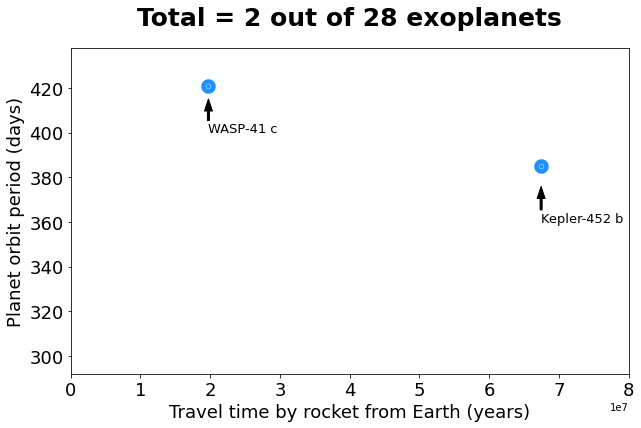

In [37]:
plot_5 = df_5.plot.scatter(x="years_by_rocket", 
                        y="pl_orbper",
                        c="dodgerblue",
                        figsize=(10,6),
                        xlim=(0,8*10**7),  
                        ylim=(365-365*mar_pl_obper,365+365*mar_pl_obper),
                        fontsize=18,
                        linewidth=10)

plot_5.set_xlabel("Travel time by rocket from Earth (years)").set_fontsize(18)
plot_5.set_ylabel("Planet orbit period (days)").set_fontsize(18)
plot_5.set_facecolor("white")
plot_5.set_title(f"Total = {len(df_5)} out of {len(df_4)} exoplanets", fontsize=25, fontweight='bold').set_position([0.5, 1.05])
plot_5.annotate("WASP-41 c", xy=(1.974594e+07,415.000), xytext=(1.974594e+07,400.000), fontsize=13, arrowprops=dict(facecolor='black', width=2, headwidth=8))
plot_5.annotate("Kepler-452 b", xy=(6.744225e+07,375.843), xytext=(6.744225e+07,360.000), fontsize=13, arrowprops=dict(facecolor='black', width=2, headwidth=8))

fig_5 = plot_5.get_figure()

In [38]:
fig_5.savefig("../Figures/fig_5.png", dpi=600)